In [1]:
import os
import yaml
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
FILE_PATH = "data/housing.csv"

In [3]:
df = pd.read_csv(FILE_PATH) 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#file check, attribute check
missing_num = len(df) - len(df.dropna())
missing_ratio = missing_num / len(df)
missing_ratio = np.round(missing_ratio * 100,3)
print(f"{missing_ratio}% of the dataset ({missing_num} points) are missing data!")    

1.003% of the dataset (207 points) are missing data!


In [5]:
#show missing data
df.loc[df.isnull().sum(axis=1) == 1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [6]:
#show NaN values
df.isnull().sum(axis=0)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
df = df.dropna()
df = df.reset_index(drop=True)

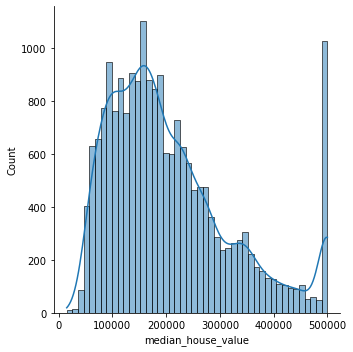

In [8]:
#show target variable
sns.displot(data=df, x="median_house_value", kde=True)

In [9]:
description = df.describe()
description

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#categorize data and prepare data split
bins = [0] + list(description["median_house_value"][
    ["25%", "50%", "75%"]
].astype(int)) + [np.inf]
print(bins)

[0, 119500, 179700, 264700, inf]


<AxesSubplot:xlabel='house_cat', ylabel='count'>

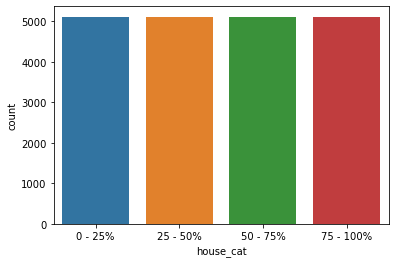

In [11]:
#categories
df["house_cat"] = pd.cut(
    df["median_house_value"],
    bins=bins,
    labels=["0 - 25%", "25 - 50%", "50 - 75%", "75 - 100%"]
)

sns.countplot(data=df, x="house_cat")

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=0)
for train_index, test_index in split.split(df, df["house_cat"]):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]    

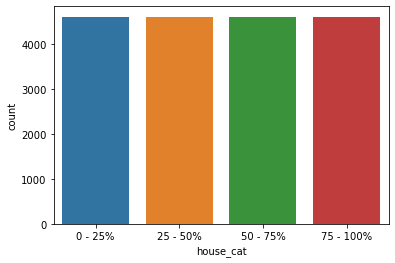

In [13]:
sns.countplot(data=df_train, x="house_cat");

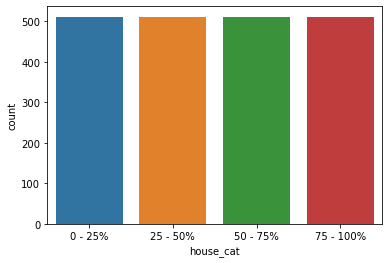

In [14]:
sns.countplot(data=df_test, x="house_cat");

In [15]:
df_train = df_train.drop("house_cat", axis=1)
df_test = df_test.drop("house_cat", axis=1)